<a href="https://colab.research.google.com/github/unrebby/project/blob/main/project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Проект

*подключение основных библиотек* 

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

### Постановка проблемы


На данный момент есть необходимость в вычислении закономерностей ценообразования, так как в условиях свободного рынка важно установить правильную цену на продукт. 

В основном для определения примерной стоимости товара используется анализ аналогов на рынке. С данной целью мы и будем рассматривать некоторые методы предоставления начальной оценки продукту: выявлять закономерности и зависимости между ценой и характеристиками.

### Подбор данных


Данные для анализа были взяты с сайта [Kaggle](https://www.kaggle.com/datasets).

Был выбран датасет из соревнования [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview), в котором хранятся данные по описанию домов, выставленных на продажу. 

Целевой переменной, зависимость с которой мы хотим смотреть, выступает цена жилья.

Проверим, что выбранный датасет подойдёт нам по критериям:



1.   Нормальный размер датасета.
2.   Не очень много пропущенных значений.


Для начала загрузим скачанные из соревнования данные:


In [263]:
df = pd.read_csv("train.csv")

Посмотрим, как выглядит таблица:

In [264]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Информации в таблице очень много (80 столбцов признаков). Позже мы будем отбирать самые важные из них.

Далее проверим первый критерий (размер датасета).



In [265]:
print('Количество записей в таблице:', df.shape[0])

Количество записей в таблице: 1460


Полторы тысячи значений должно быть достаточно для базового анализа данных, поэтому переходим ко второму критерию.

In [266]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Да, признаков в данном датасете много, но они практически полностью заполнены (количество пропусков в каждом столбце не превосходит 100 за исключением 5 столбцов).

Далее мы постараемся заполнить эти пропуски.

### Подготовка данных


Для дальнейшей корректной работы необходимо подготовить данные.

Первым, что необходимо сделать, является заполнение пропусков.

В предыдущем пункте мы посчитали количество пропусков для каждого столбца с помощью функции `.info()`. Рассмотрим те столбцы, где есть пропуски.

С помощью функций `.isna().sum()` мы можем получить в явном виде количество пропусков в столбце.



In [267]:
a = df.isna().sum()
print('Количество пропусков в столбцах:')
print(a[a != 0])

Количество пропусков в столбцах:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Признаки, в которых больше половины данных не заполнены можно пока что не рассматривать, так как они скорее всего выделяют небольшую категорию данных.

Рассмотрим остальные и решим, какие их них стоит оставить и как заполнить пустые значения.

*LotFrontage* - данный столбец не стоит игнорировать, поэтому необхожимо заполнить 259 пропусков (его будем заполнять средним значением).
 
*Alley* - можно игнорировать данный столбец, так как он не заполнен в 1369 строчках (т. е. заполнен меньше, чем в 90). 

*MasVnrType* - данный столбец хранит тип данных строка, также тут достаточно мало пропусков, поэтому заполним их просто пустой строкой.

*MasVnrArea* - данный столбец также содержит мало пропусков, заполнить их можно нулями (так как это достаточно редкий признак).

*BsmtQual, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2* - данные столбцы содержат данные о подвале (в виде строки), что желательно оставить для анализа, поэтому будем заполнять его пропущенные значения пустой строкой.

*Electrical* - данные о электрической системе, достаточно важная информация, и присутствует всего 1 пропуск, заполним его самым популярным ответом данного столбца.   

*FireplaceQu* - данный столбец содержит информацию о камине и больше половины пропусков, поэтому можно просто удалить данный столбец.

*GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond*  - информация о гараже, которая не заполнена для 81 дома, заполним их также пустыми строками.  

*PoolQC* - данные о бассейне, очень много пропусков, можно игнорировать столбец, либо заполнить пропуски пустыми строками, что будет говорить об отсутствии бассейна (т. к. вряд ли продавец забыл бы указать его наличие).   

*Fence, MiscFeature* - содержится очень много пропусков, которые сложно заполнить правильно, поэтому эти столбцы будут игнорироваться.


Для начала удалим все столбцы, которые хотели игнорировать (Alley, FireplaceQu, Fence, MiscFeature):

In [268]:
df.drop(columns=['Alley', 'FireplaceQu', 'Fence', 'MiscFeature'], inplace=True)

Теперь обработаем столбцы LotFrontage и Electrical:

In [269]:
df.fillna(value=dict.fromkeys(['LotFrontage'], round(df['LotFrontage'].mean())), inplace=True)

In [270]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Самое частое значение в столбце Electrical - SBrkr. Заполняем им.

In [271]:
df.fillna(value=dict.fromkeys(['Electrical'], 'SBrkr'), inplace=True)

Все остальные заполняются пустыми строками либо нулями следующим образом:

In [272]:
df.fillna(value=dict.fromkeys(df.select_dtypes(include='object').columns.tolist(), ' '), inplace=True)
df.fillna(value=dict.fromkeys(df.select_dtypes(include=['int64', 'float64']).columns.tolist(), 0), inplace=True)

Проверим, что все заполнилось:

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Данные готовы.

### Работа с датасетом


Признаков в датасете у нас очень много, поэтому нам необходимо отобрать те признаки, которые изначально кажутся бесполезными.

Заметим, что мы хотим вычислять зависимость целевой переменной (SalePrice) от признаков, поэтому и корреляция нас интересует для неё.

Чтоб нарисовать красивую диаграмму корреляции, отделим колонку с целевой переменной от признаков.

In [274]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

Строим корреляцию между целевой переменной и числовыми признаками.

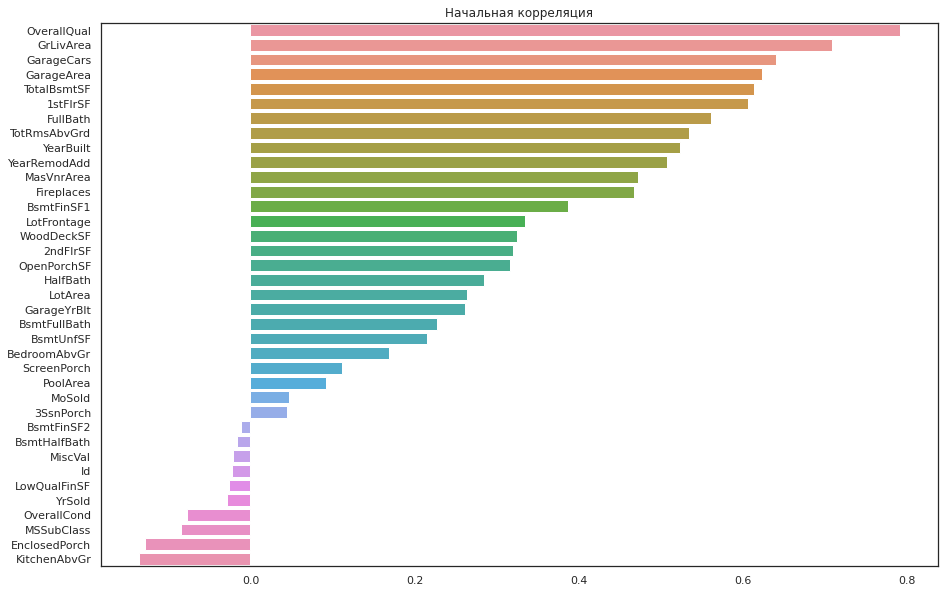

In [275]:
numeric_data = x.select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = x[numeric_features].corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title('Начальная корреляция')
plot.figure.set_size_inches(15, 10)
plt.savefig('Начальная_корреляция.png')

In [276]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261366
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334897
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

Можно отбросить признаки, у которых корреляция меньше, чем 0.3 по модулю, так как с ними получается слабая зависимость.

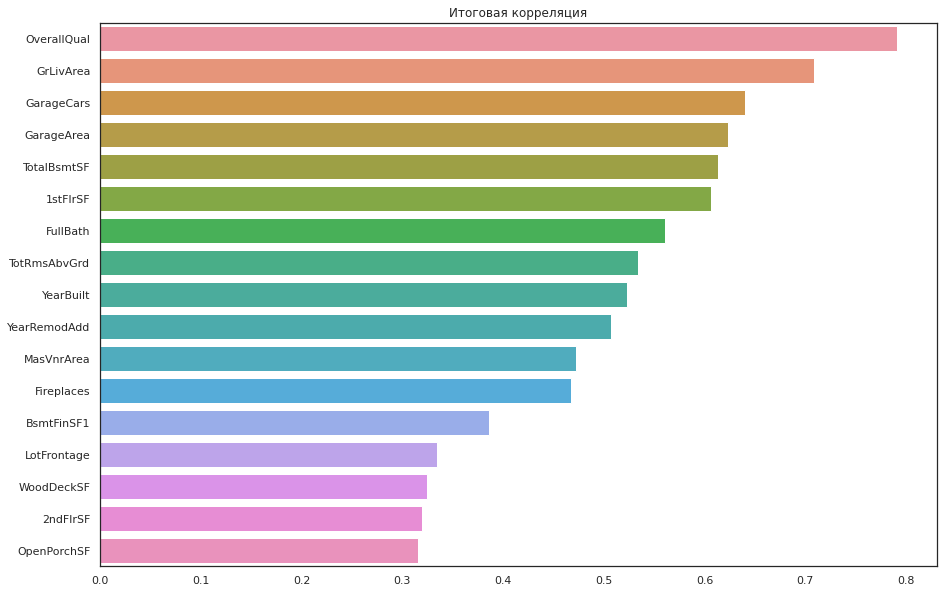

In [277]:
good_features = ['OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 
                 'Fireplaces', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 
                 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 
                 'GarageCars', 'GrLivArea', 'OverallQual']

numeric_data = x[good_features]
numeric_features = good_features

correlations = x[numeric_features].corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title('Итоговая корреляция')
plot.figure.set_size_inches(15, 10)
plt.savefig('Итоговая_корреляция.png')

Также можно построть тепловую карту для отображения корреляции (тут нас будет интересовать с основном столбец целевой переменной).




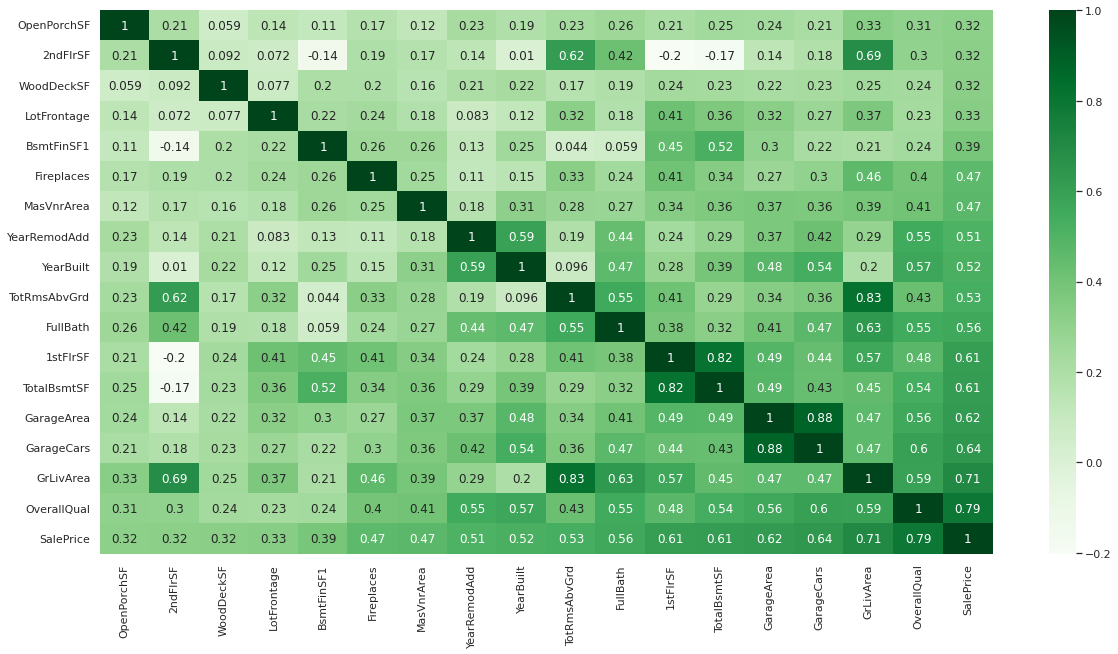

In [278]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df[good_features + ['SalePrice']].corr(), annot = True, cmap='Greens')
plt.savefig('Тепловая_карта.png')

Все остальные признаки считаются категориальными.

### Регрессия


#### Линейная регрессия

Попробуем обучить линейную Ridge-регрессию. Для этого необходимо разбить выборку на обучающую и тестовую. Будем использовать методы обработки прихнаков: для категориальных - OneHotEncoding, для численных - StandardScaler. 

Для оценки работы модели используем метрику RMSE, которая вычисляет корень из среднеквадратичной ошибки наших прогнозов.

In [294]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [295]:
notnum_feats = x.select_dtypes([object]).columns
num_feats = x.select_dtypes([np.number]).columns #good_features

In [296]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

y_train_pred = model.predict(x_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 32203.2778
Train RMSE = 20266.9977


Посмотрим на среднее и медианное значения целевой переменной.

In [297]:
df['SalePrice'].sort_values()

495      34900
916      35311
968      37900
533      39300
30       40000
         ...  
803     582933
898     611657
1169    625000
1182    745000
691     755000
Name: SalePrice, Length: 1460, dtype: int64

In [298]:
df['SalePrice'].mean()

180921.19589041095

In [299]:
df['SalePrice'].median()

163000.0

**Небольшой вывод (оценка качества модели):** с помощью метрики RMSE мы получили ошибку 20 000 - 30 000, что означает, что модель выдает результат, который может отличаться от истинных значений на данную сумму.

Кажется, что это довольно большое число, однако если посмотреть на среднее и медианное значение, то можно заметить, что средний ценник домов составляет больше 180 000 и может доходить до 755 000. Поэтому модель ошибается на 10-15% относительно средней цены, что является хорошим результатом, учитывая то, что мы не применяли никаких умных алгоритмов машинного обучения.

#### Логистическая регрессия

Попробуем также обучить логистическую регрессию, но для метода классификации домов по следующему принципу:

обучим модель так, чтобы она выдавала результат типа "выше ли ценник этого дома относительно медианного значения".

Для этого необходимо поменять целевую переменную. Сделаем это следующим образом:



In [248]:
df_new = df.copy()

In [249]:
df_new.loc[df_new['SalePrice'] > df_new['SalePrice'].median(), 'SalePrice'] = 1
df_new.loc[df_new['SalePrice'] != 1, 'SalePrice'] = 0

In [250]:
x = df_new.drop(columns=['SalePrice'])
y = df_new['SalePrice']

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Теперь обучим модель и посмотрим на качество.

In [252]:
column_transformer = ColumnTransformer([
    ('oe', OneHotEncoder(handle_unknown="ignore"), notnum_feats),
    ('scaling', StandardScaler(), num_feats)
])

pipeline = Pipeline(steps=[
    ('oe_and_scaling', column_transformer),
    ('regression', LogisticRegression(max_iter=100000))
])

model = pipeline.fit(x_train, y_train)

precision, recall, _ = precision_recall_curve(y_test, model.decision_function(x_test))
print('PR-AUC: %.5f' %auc(recall, precision))
print('AUC-ROC: %.5f' % roc_auc_score(y_test, model.decision_function(x_test)))

PR-AUC: 0.95206
AUC-ROC: 0.96001


**Небольшой вывод (оценка качества модели):** с помощью метрик PR-AUC и AUC-ROC (это основные метрики для задач классификации) мы получили высокое качество модели (процент верных ответов равен 95%). Это достаточно высокий показатель, значит наша модель с высокой точностью может классифицировать дома по признакам на два класса: ценник сверх медианного значения или нет.


### Визуализация

Мы уже кратко ознакомились с корреляцией признаков с целевой переменной, но стоит также посмотреть, какая именно зависимость прослеживается между ними.

Посмотрим закономерности между таргетом (целевой переменной) и теми признаками, которые имеют наибольшую корреляцию с ним.

Для этого необходимо снова вывести график корреляции.

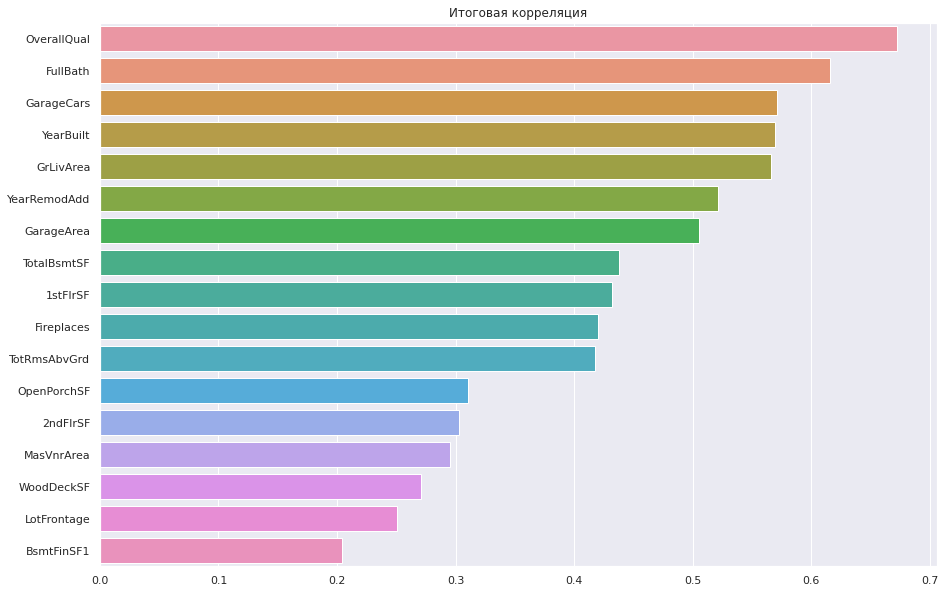

In [253]:
numeric_data = x[good_features]
numeric_features = good_features

correlations = x[numeric_features].corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title('Итоговая корреляция')
plot.figure.set_size_inches(15, 10)
plt.savefig('Итоговая_корреляция.png')

Рассмотрим зависимость для некоторых из них.

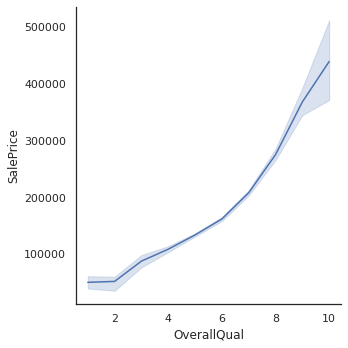

In [254]:
sns.set(style="white")

sns.relplot(x='OverallQual',
            y='SalePrice',
            kind='line',
            data=df)

plt.savefig('Зависимость1.png')

Данный график указывает на следующий факт: чем выше общее качество материалов, тем дороже дом. Тренд восходящий => прямопропорциональная связь.

Данный признак имеет наибольшую корреляцию с таргетом, а значит является одним из важнейших. 

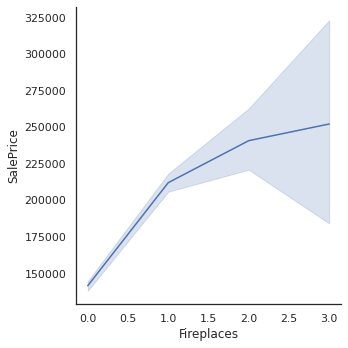

In [255]:
sns.set(style="white")

sns.relplot(x='Fireplaces',
            y='SalePrice',
            kind='line',
            data=df)

plt.savefig('Зависимость2.png')

Данный признак указывает на количество каминов в доме.

На графике видно: чем больше каминов, тем дороже дом, причем разброс значений увеличивается с возрастанием данного признака. 

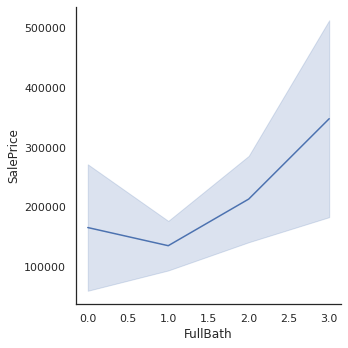

In [256]:
sns.set(style="white")

sns.relplot(x='FullBath',
            y='SalePrice',
            kind='line',
            ci='sd',
            data=df)

plt.savefig('Зависимость3.png')

Признак указывающий на количество спален выше уровня подвала. Повышение цены связано с тем, что низкие дома стоят дешевле (особенно заметно на примере Китая, где подвальные помещения сдаются как жилые).

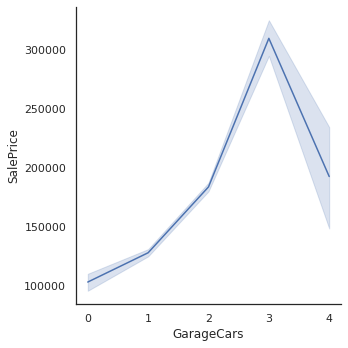

In [257]:
sns.set(style="white")

sns.relplot(x='GarageCars',
            y='SalePrice',
            kind='line',
            data=df)

plt.savefig('Зависимость4.png')

Здесь отображена связь с признаком, указывающим на вместимость гаража (какое имеется количество мест для автомобилей).

В стандартных домах низкого сегмента гаража либо нет, либо он вмещает одну машину. При возрастании количества автомобилей, возрастает и цена на дом, так как большое количество машин указывает на материальный достаток человека.

Максимум достигается при значении признака равном 3.

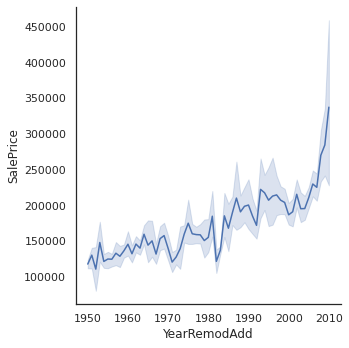

In [258]:
sns.set(style="white")

sns.relplot(x='YearRemodAdd',
            y='SalePrice',
            kind='line',
            data=df)

plt.savefig('Зависимость5.png')

Признак даты реконструкции дома. Также очевидная зависимость: чем новее дом (или если был недавно сделан ремонт), тем выше ценник дома.

### Выводы

Таким образом, изначальная гипотеза о том, что предсказывать цену с помощью анализа данных можно с высокой точностью, подтвердилась. 

В данной работе было приведено два алгоритма, которые показали хорошие результаты (они описаны в небольших выводах). Один из них был нацелен на предсказание цены дома, другой - на классификацию домов по признаку.

Были выведены те признаки, которые наибольшим образом коррелируют с целевой переменной и влияют на итоговый результат. 

Данное исследование было нацелено на сферу ценообразования: рассмотрели вариант установки цены после обучения модели на некоторых данных. 

В дальнейших работах модель линейной регрессии можно улучшать при помощи известных алгоритмов для улучшения качества, однако даже полученная в этом исследовании модель показала высокие результаты.